<a href="https://colab.research.google.com/github/MLakshmiNarasimhan/miniproject/blob/master/scikit_learn_image_classification_using_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
from subprocess import check_output

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

In [ ]:
digits = datasets.load_digits()
print('Digits dataset keys \n{}'.format(digits.keys()))

Digits dataset keys 
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [ ]:
print('dataset target name: \n{}'.format(digits.target_names))
print('shape of datset: {} \nand target: {}'.format(digits.data.shape, digits.target.shape))
print('shape of the images: {}'.format(digits.images.shape))

dataset target name: 
[0 1 2 3 4 5 6 7 8 9]
shape of datset: (1797, 64) 
and target: (1797,)
shape of the images: (1797, 8, 8)


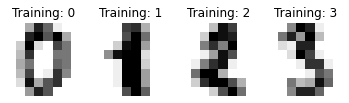

In [ ]:
for i in range(0,4):
    plt.subplot(2, 4,i + 1)
    plt.axis('off')
    imside = int(np.sqrt(digits.data[i].shape[0]))
    im1 = np.reshape(digits.data[i],(imside,imside))
    plt.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(digits.target[i]))
plt.show()

In [ ]:
n_samples = len(digits.images)
data_images = digits.images.reshape((n_samples, -1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_images,digits.target)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(1347, 64), (1347,)
Test data and target sizes: 
(450, 64), (450,)


In [ ]:
classifier = svm.SVC(gamma=0.001)

classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.98      0.98        52
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        44
           8       0.98      0.98      0.98        45
           9       1.00      1.00      1.00        40

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted a

In [ ]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[50  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  0  0  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  0  0  0]
 [ 0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0]
 [ 0  1  0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0  0  0  0 40]]
